In [13]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

ticker = "AAPL"
start_date = "2000-01-01"
end_date = "2023-07-06"
# Fetch hourly historical data from Yahoo Finance API
stock_data = yf.download(ticker, start=start_date, end=end_date, interval="1D")

stock_data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.849468,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.777849,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.789232,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.720933,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.755083,460734400


In [14]:
pivot_point = (stock_data['High'] + stock_data['Low'] + stock_data['Close']) / 3
# Calculate support and resistance levels
first_support = (2 * pivot_point) - stock_data['High']
first_resistance = (2 * pivot_point) - stock_data['Low']
second_support = pivot_point - (stock_data['High'] - stock_data['Low'])
second_resistance = pivot_point + (stock_data['High'] - stock_data['Low'])
third_support = pivot_point - 2 * (stock_data['High'] - stock_data['Low'])
third_resistance = pivot_point + 2 * (stock_data['High'] - stock_data['Low'])
# Create a new DataFrame to store the pivot points and support/resistance levels
pivot_df = pd.DataFrame(index=stock_data.index)
pivot_df['Pivot'] = pivot_point
pivot_df['Support 1'] = first_support
pivot_df['Resistance 1'] = first_resistance
pivot_df['Support 2'] = second_support
pivot_df['Resistance 2'] = second_resistance
pivot_df['Support 3'] = third_support
pivot_df['Resistance 3'] = third_resistance
# Merge the pivot DataFrame with the stock data DataFrame
stock_data_with_pivot = pd.concat([stock_data, pivot_df], axis=1)

In [15]:
stock_data_with_pivot

,Open,High,Low,Close,Adj Close,Volume,Pivot,Support 1,Resistance 1,Support 2,Resistance 2,Support 3,Resistance 3
Date,,,,,,,,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.849468,535796800,0.970610,0.936756,1.033296,0.874070,1.067150,0.777530,1.163690
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.777849,512377600,0.935454,0.883185,0.967448,0.851191,1.019717,0.766928,1.103980
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.789232,778321600,0.945126,0.903088,0.970610,0.877604,1.012648,0.810082,1.080170
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.720933,767972800,0.883928,0.812500,0.919643,0.776785,0.991071,0.669642,1.098214
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.755083,460734400,0.880953,0.860119,0.909226,0.831846,0.930060,0.782739,0.979167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-28,187.929993,189.899994,187.600006,189.250000,189.250000,51216800,188.916667,187.933339,190.233327,186.616679,191.216654,184.316691,193.516642
2023-06-29,189.080002,190.070007,188.940002,189.589996,189.589996,46347300,189.533335,188.996663,190.126668,188.403330,190.663340,187.273326,191.793345
2023-06-30,191.630005,194.479996,191.259995,193.970001,193.970001,85069600,193.236664,191.993332,195.213333,190.016663,196.456665,186.796661,199.676666


In [16]:
# Creating signals 
stock_data_with_pivot['Signal'] = 0
stock_data_with_pivot.loc[stock_data_with_pivot['Low'] < stock_data_with_pivot['Support 1'], 'Signal'] = 1
stock_data_with_pivot.loc[stock_data_with_pivot['Low'] < stock_data_with_pivot['Support 2'], 'Signal'] = 1
stock_data_with_pivot.loc[stock_data_with_pivot['Low'] < stock_data_with_pivot['Support 3'], 'Signal'] = 1
stock_data_with_pivot.loc[stock_data_with_pivot['High'] > stock_data_with_pivot['Resistance 1'], 'Signal'] = 0
stock_data_with_pivot.loc[stock_data_with_pivot['High'] > stock_data_with_pivot['Resistance 2'], 'Signal'] = 0
stock_data_with_pivot.loc[stock_data_with_pivot['High'] > stock_data_with_pivot['Resistance 3'], 'Signal'] = 0

In [17]:
stock_data_with_pivot

,Open,High,Low,Close,Adj Close,Volume,Pivot,Support 1,Resistance 1,Support 2,Resistance 2,Support 3,Resistance 3,Signal
Date,,,,,,,,,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.849468,535796800,0.970610,0.936756,1.033296,0.874070,1.067150,0.777530,1.163690,1
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.777849,512377600,0.935454,0.883185,0.967448,0.851191,1.019717,0.766928,1.103980,0
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.789232,778321600,0.945126,0.903088,0.970610,0.877604,1.012648,0.810082,1.080170,0
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.720933,767972800,0.883928,0.812500,0.919643,0.776785,0.991071,0.669642,1.098214,0
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.755083,460734400,0.880953,0.860119,0.909226,0.831846,0.930060,0.782739,0.979167,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-28,187.929993,189.899994,187.600006,189.250000,189.250000,51216800,188.916667,187.933339,190.233327,186.616679,191.216654,184.316691,193.516642,1
2023-06-29,189.080002,190.070007,188.940002,189.589996,189.589996,46347300,189.533335,188.996663,190.126668,188.403330,190.663340,187.273326,191.793345,1
2023-06-30,191.630005,194.479996,191.259995,193.970001,193.970001,85069600,193.236664,191.993332,195.213333,190.016663,196.456665,186.796661,199.676666,1


In [18]:
X = stock_data_with_pivot.drop(columns=['Signal'])
y= stock_data_with_pivot['Signal'].copy()

In [19]:
from pandas.tseries.offsets import DateOffset

training_begin = stock_data_with_pivot.index.min()
training_end = stock_data_with_pivot.index.min() + DateOffset(years= 22)

# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Display sample data


y_train.value_counts()

1    2870
0    2667
Name: Signal, dtype: int64

In [20]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

# Display sample data

y_test.value_counts()

1    208
0    169
Name: Signal, dtype: int64

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


# Define the model
model = RandomForestClassifier(n_estimators=100)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier()

In [22]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Print a classification report
print(classification_report(y_test, y_pred))

# Print the overall accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.61      0.37      0.46       169
           1       0.61      0.81      0.70       208

    accuracy                           0.61       377
   macro avg       0.61      0.59      0.58       377
weighted avg       0.61      0.61      0.59       377

Accuracy: 0.6127320954907162


In [23]:
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted Signal'], index=X_test.index)

stock_and_predicted_signals = pd.concat([X_test, y_pred_df], axis=1)

Return on Investment: -12.683037261962893%
Earnings: $-1268.303726196289


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


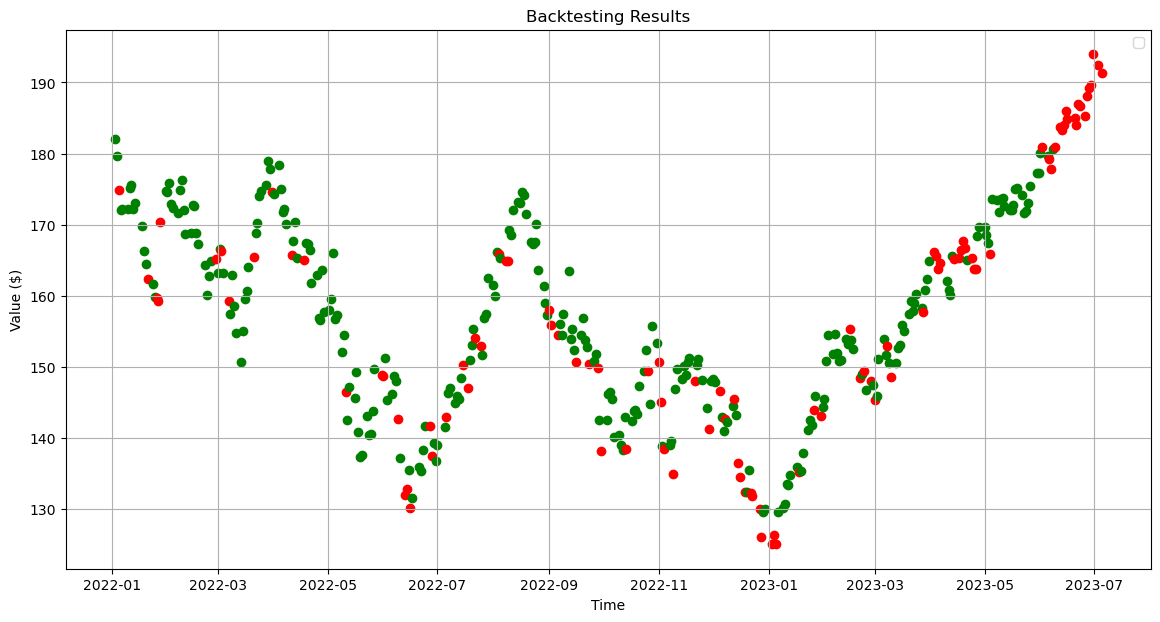

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize portfolio with 0 units of the security and $10000 cash
portfolio = {"cash": 10000, "security": 0}

# List to store portfolio value at each point in time
portfolio_values = []

# List to store transaction points for plotting
transactions = []

# Iterate over the DataFrame rows (each row corresponds to a day)
for index, row in stock_and_predicted_signals.iterrows():
    signal = row['Predicted Signal']
    price = row['Close']
    if signal == 1:  # Buy signal
        # Buy as many units as possible
        units_to_buy = portfolio['cash'] // price
        portfolio['cash'] -= units_to_buy * price
        portfolio['security'] += units_to_buy
        transactions.append({"time": index, "price": price, "action": "buy"})
    elif signal == 0:  # Sell signal
        # Sell all units
        portfolio['cash'] += portfolio['security'] * price
        portfolio['security'] = 0
        transactions.append({"time": index, "price": price, "action": "sell"})
    # Calculate and store the total portfolio value (cash + value of securities)
    portfolio_values.append(portfolio['cash'] + portfolio['security'] * price)

# Convert list of portfolio values to a pandas Series
portfolio_values = pd.Series(portfolio_values, index=stock_and_predicted_signals.index)

# Calculate the ROI
roi = (portfolio_values.iloc[-1] / portfolio_values.iloc[0] - 1) * 100

# Print ROI
print(f'Return on Investment: {roi}%')

# Print earnings
earnings = portfolio_values.iloc[-1] - portfolio_values.iloc[0]
print(f'Earnings: ${earnings}')

# Plot
plt.figure(figsize=(14, 7))
plt.title('Backtesting Results')
plt.xlabel('Time')
plt.ylabel('Value ($)')
for transaction in transactions:
    color = 'g' if transaction['action'] == "buy" else 'r'
    plt.scatter(transaction['time'], transaction['price'], color=color)
plt.legend()
plt.grid()
plt.show()
